# BIST100 

In [42]:
library(repr)
library(readxl)
historicalset <- read_excel("BIST30-BIST100-Historical-Values.xlsx", ,sheet = 2, skip = 3, col_types = c("date", "numeric"), col_names = c("Dates","Close_Price"))
head(historicalset,5)
tail(historicalset,5)
summary(historicalset)

Dates,Close_Price
1997-10-20,3416
1997-10-21,3442
1997-10-22,3497
1997-10-23,3543
1997-10-24,3512


Dates,Close_Price
2018-11-13,92708.56
2018-11-14,93287.16
2018-11-15,93296.84
2018-11-16,93616.45
2018-11-19,94570.90


     Dates                      Close_Price    
 Min.   :1997-10-20 00:00:00   Min.   :  1852  
 1st Qu.:2003-02-06 18:00:00   1st Qu.: 13783  
 Median :2008-05-13 12:00:00   Median : 43442  
 Mean   :2008-05-12 05:25:57   Mean   : 45402  
 3rd Qu.:2013-08-14 06:00:00   3rd Qu.: 73279  
 Max.   :2018-11-19 00:00:00   Max.   :120845  

In [43]:
library(lubridate)
library(quantmod)
data.xts <- xts(historicalset$Close_Price, order.by = as.Date(historicalset$Dates))
weeklydata <- to.weekly(data.xts, name = "W")
head(weeklydata,5)
logReturn <- as.xts(log(weeklydata$W.Close)-log(weeklydata$W.Open))
dimnames(logReturn)[2] <- "LogReturn"
head(logReturn)

           W.Open W.High W.Low W.Close
1997-10-24   3416   3543  3416    3512
1997-10-31   3119   3119  2717    2846
1997-11-07   2846   3168  2846    2958
1997-11-14   2983   2983  2692    2692
1997-11-21   2890   3077  2890    3077

             LogReturn
1997-10-24  0.02771540
1997-10-31 -0.09159794
1997-11-07  0.03859886
1997-11-14 -0.10264509
1997-11-21  0.06269859
1997-11-28  0.03247726

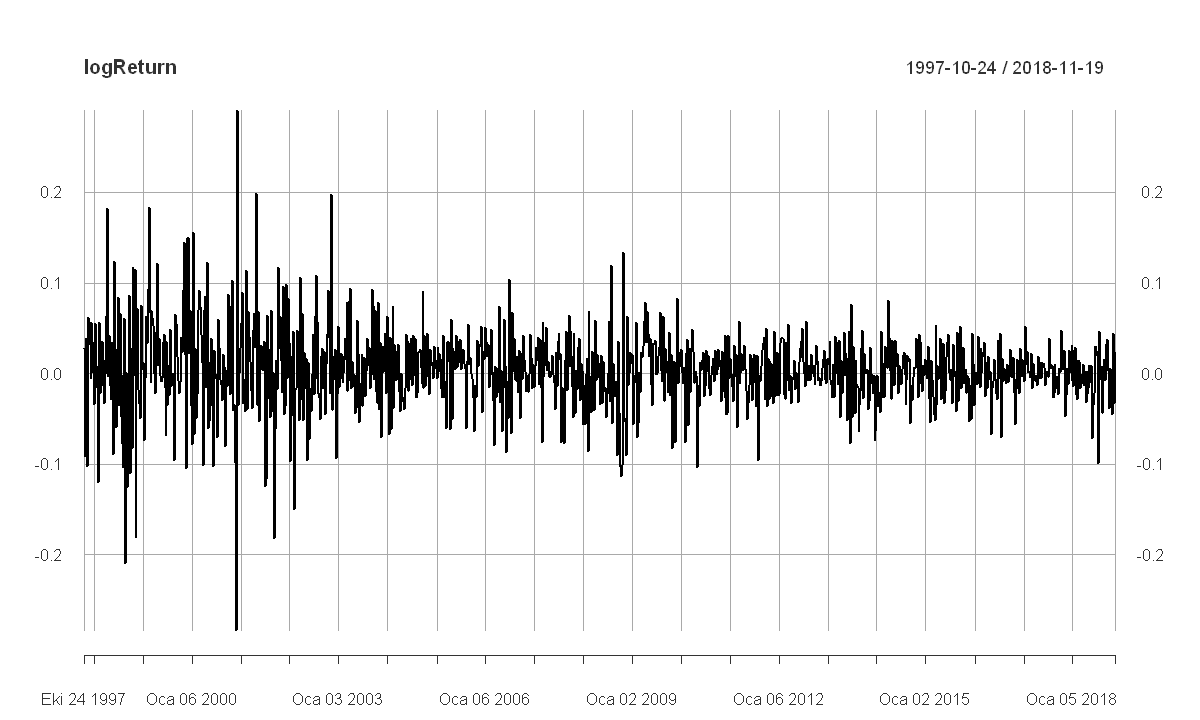

In [44]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(logReturn)

In [45]:
library(tseries)
adf.test(logReturn)

Warning message in adf.test(logReturn):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  logReturn
Dickey-Fuller = -10.103, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [46]:
library(forecast)
full.model <- auto.arima(logReturn)
summary(full.model)

Series: logReturn 
ARIMA(2,1,0) 

Coefficients:
          ar1      ar2
      -0.7802  -0.3585
s.e.   0.0282   0.0282

sigma^2 estimated as 0.002524:  log likelihood=1723.51
AIC=-3441.02   AICc=-3440.99   BIC=-3426.02

Training set error measures:
                        ME       RMSE        MAE MPE MAPE      MASE        ACF1
Training set -3.781893e-06 0.05017458 0.03607684 NaN  Inf 0.7677519 -0.08260626


In [47]:
shapiro.test(full.model$residuals)


	Shapiro-Wilk normality test

data:  full.model$residuals
W = 0.95306, p-value < 2.2e-16


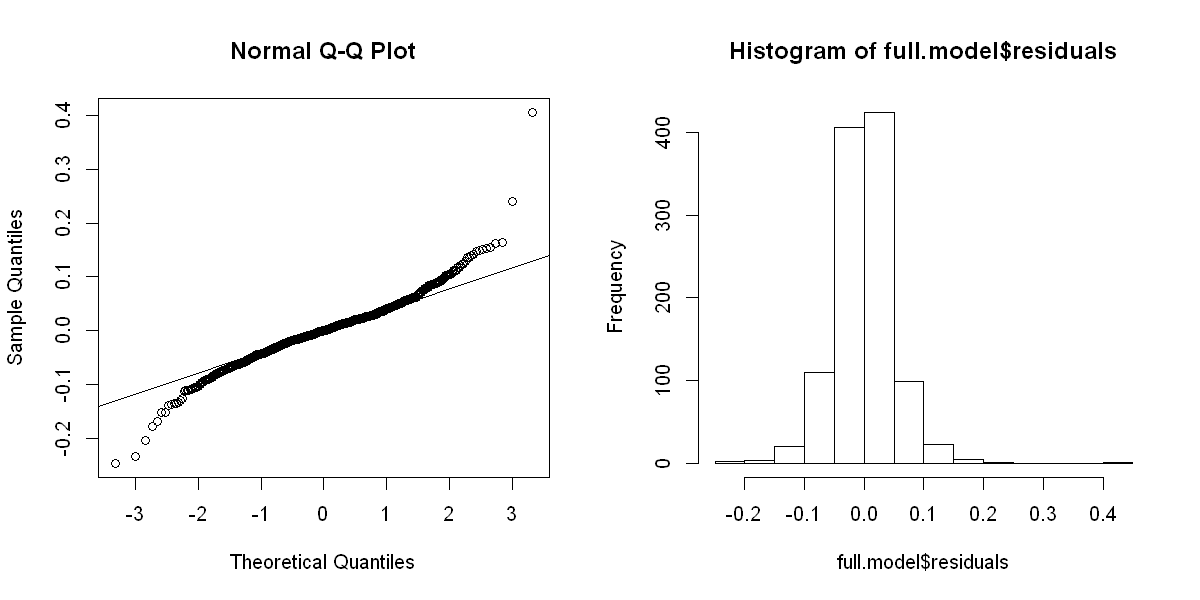

In [48]:
options(repr.plot.height = 5, repr.plot.width = 10)
par(mfrow=c(1,2))
qqnorm(full.model$residuals)
qqline(full.model$residuals)
hist(full.model$residuals)


	Ljung-Box test

data:  Residuals from ARIMA(2,1,0)
Q* = 121.08, df = 8, p-value < 2.2e-16

Model df: 2.   Total lags used: 10



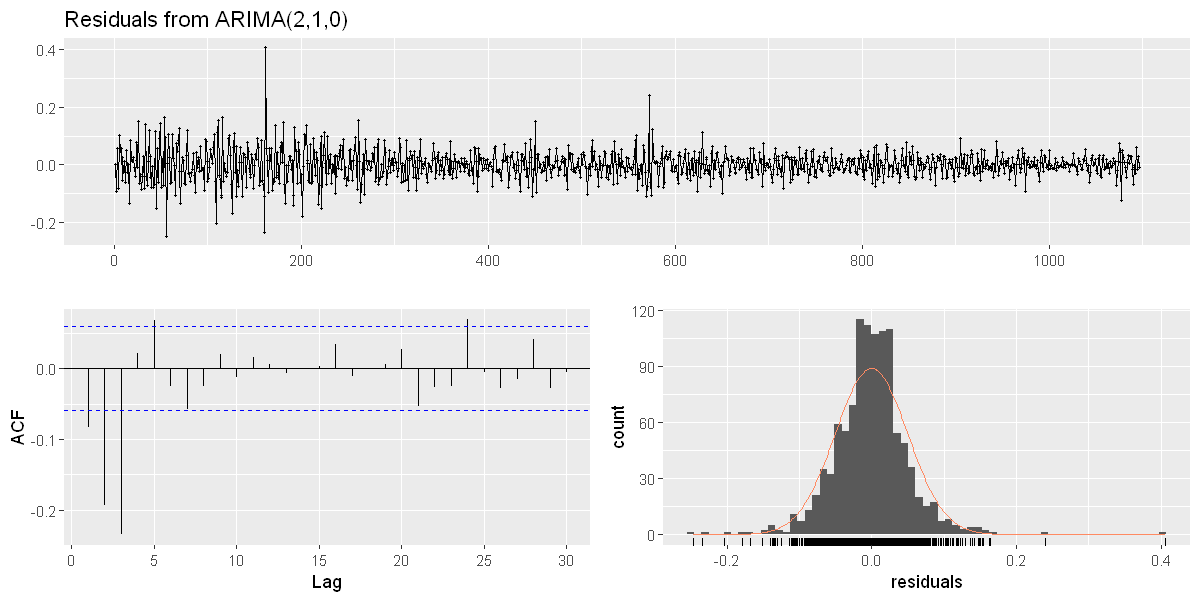

In [49]:
checkresiduals(full.model)

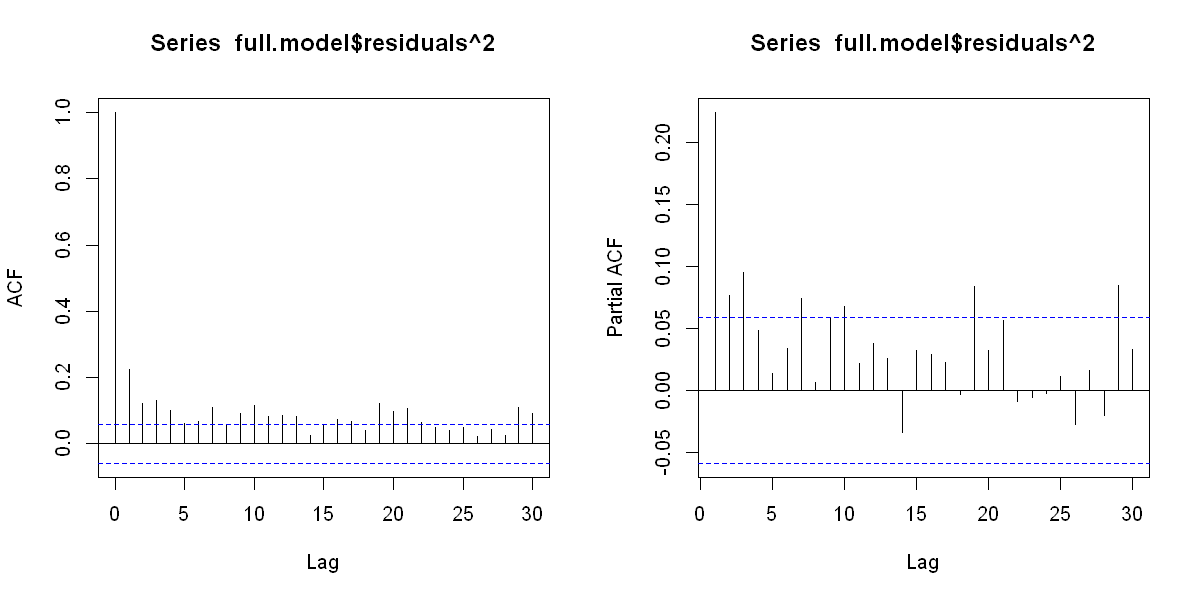

In [38]:
par(mfrow=c(1,2))
acf(full.model$residuals^2)
pacf(full.model$residuals^2)

In [50]:
library(MTS)
archTest(coredata(full.model$residuals))

Q(m) of squared series(LM test):  
Test statistic:  152.963  p-value:  0 
Rank-based Test:  
Test statistic:  257.7054  p-value:  0 


In [40]:
library(fGarch)

In [41]:
fit <- garchFit(~garch(1,1), data = full.model$residuals, trace = F)
summary(fit)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = full.model$residuals, 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x0000000005c6e598>
 [data = full.model$residuals]

Conditional Distribution:
 norm 

Coefficient(s):
         mu        omega       alpha1        beta1  
-3.7819e-05   3.4871e-05   1.0623e-01   8.8151e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu     -3.782e-05   1.084e-03   -0.035   0.9722    
omega   3.487e-05   1.659e-05    2.102   0.0355 *  
alpha1  1.062e-01   2.406e-02    4.416 1.01e-05 ***
beta1   8.815e-01   2.684e-02   32.842  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 1880.122    normalized:  1.713876 

Description:
 Tue Mar 05 19:13:18 2019 by user: Ismail 


Standardised Residuals Tests:
                                Statistic p-Value     
 Jarque-Bera Test   R    Chi^2  27.7776   

 #### The model confirms that the following parameters alpha1 and beta1 are all significant. The Ljung-box test confirms that the residuals do not have anymore heteroscedasticity because the p-values are very small up to lag 10.

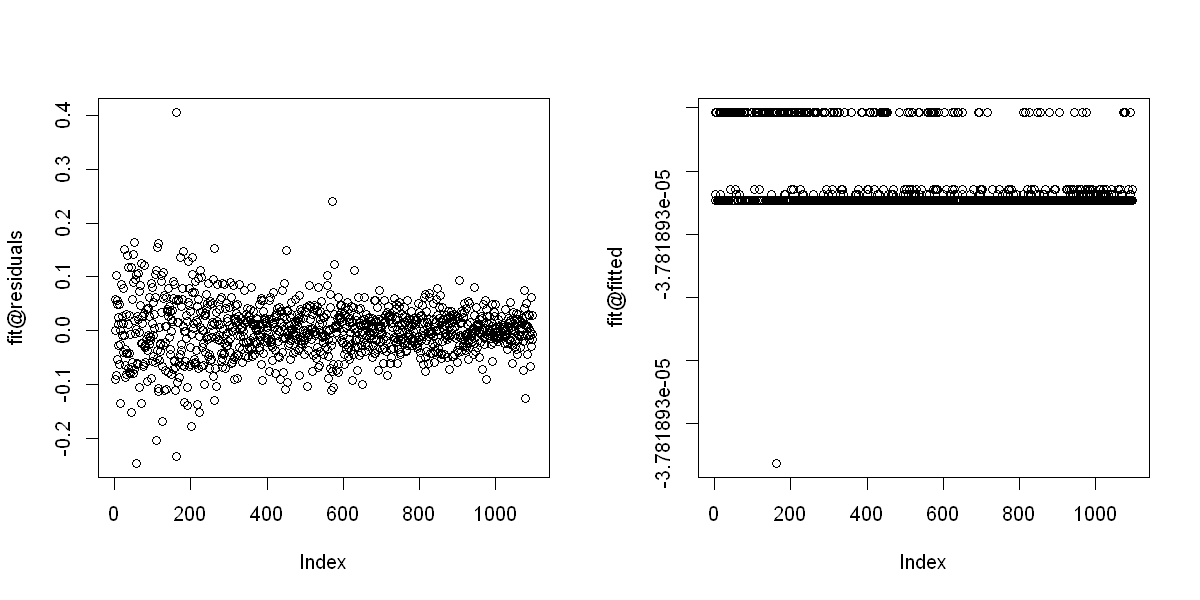

In [53]:
par(mfrow=c(1,2))
plot(fit@residuals)
plot(fit@fitted)